<a href="https://colab.research.google.com/github/aruanalucena/br-data-science/blob/master/C%C3%B3pia_Turn_Over_HR_ANALYTICS_modelo_com_estrat%C3%A9gia_de_reten%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/mbdq8P5.png)

#<font color='arrow'>**TURN OVER Modelo com estratégia de retenção de funcionários : Estudo de caso de RH analytics**

# <font color='blue'>INDICE
* Definição do Problema



* Representam dados fictícios/falsificados sobre cancelamentos. Para cada 10 anos ele mostra os funcionários que estão ativos e aqueles que terminaram.

* A intenção é ver se as rescisões individuais podem ser previstas a partir dos dados fornecidos.

> O que deve ser previsto é o status de ativo ou rescindido.

>Conteúdo
> Os dados contêm

>1. identificação do funcionário
>1.data de registro do funcionário ( ano dos dados)
>1.data de nascimento
>1.data de contratação
>1.data de término
>1.idade
>1.tempo de serviço
>1.cidade
>1.departamento
>1.cargo
>1.número da loja
>1.gênero
>1.motivo da rescisão
>1.tipo de rescisão
>1.ano de status
>1.status
>1.unidade de negócios


>* A rotatividade de funcionários  é um problema dispendioso para as empresas. O verdadeiro custo da substituição de um funcionário
pode muitas vezes ser bastante grande. Um estudo realizado pela constatação de que as empresas normalmente pagam cerca de um quinto do salário de um funcionário para substituir esse funcionário, e o custo pode aumentar significativamente se os executivos ou funcionários mais bem pagos forem substituídos. 
>* Em outras palavras, o custo de substituição de empregados para a maioria dos empregadores continua sendo significativo. Isto se deve ao tempo gasto para entrevistar e encontrar um substituto, aos bônus de admissão e à perda de produtividade por vários meses enquanto o novo funcionário se acostuma com a nova função.

>* Algoritmos de aprendizagem de máquinas freqüentemente mostram exemplos de rotatividade de clientes para telcos ou marketing de produtos. Esses algoritmos se aplicam igualmente à rotatividade de funcionários.



#<font color='arrow'>Visão geral do projeto
 
> * A rotatividade dos funcionários é um problema dispendioso para as empresas. O verdadeiro custo de substituição de um funcionário pode ser muitas vezes bastante grande. Um estudo do Center for American Progress descobriu que as empresas normalmente pagam cerca de um quinto do salário de um funcionário para substituir esse funcionário, e o custo pode aumentar significativamente se os executivos ou funcionários mais bem pagos forem substituídos. 
>* Em outras palavras, o custo de substituição de empregados para a maioria dos empregadores continua sendo significativo. Isto se deve ao tempo gasto para entrevistar e encontrar um substituto, aos bônus de admissão e à perda de produtividade por vários meses enquanto o novo funcionário se acostuma com a nova função.


#<font color='arrow'> Problemas dificuldades
> * Entender por que e quando os funcionários estão mais propensos a sair pode levar a ações para melhorar a retenção de funcionários, assim como possivelmente planejar novas contratações com antecedência. 
> * Tentarei  uma abordagem sistemática passo a passo usando um método que poderia ser usado para uma variedade de problemas de ML. Este projeto se enquadraria no que é comumente conhecido como "Análise de RH"

Neste projeto, vamos tentar responder o seguinte problema

*  Qual é a probabilidade de um funcionário ativo deixar a empresa?
* Quais são os indicadores-chave de um empregado que deixa a empresa?
* Que políticas ou estratégias podem ser adotadas com base nos resultados para melhorar a retenção de funcionários? 

Dado que temos dados sobre ex-empregados, este é um problema de classificação supervisionado binario,  
(empregado ativo)= 1 
(ex-empregado).
 Neste estudo, nossa variável alvo(target) Y é a probabilidade de um funcionário deixar a empresa.

![Imgur](https://i.imgur.com/62WBQa6.jpg)

# Analise do Dataset
Neste estudo de caso, um conjunto de dados de Employee Attrition (Kaggle)People HR Analytics Repository, que contém dados de funcionários para 49.656 funcionários com 18 váriaveis  sobre os funcionários. Vou utilizar este conjunto de dados para prever quando os funcionários vão demitir-se, entendendo os principais fatores de rotatividade dos funcionários.



# Importando as Bibliotecas

###  Manipulação e Análise de Dados

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
import os
print(os.listdir("../input"))
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Visualização dos Dados

# Importando os Dados

In [17]:
df_sourcefile = pd.read_csv('/content/HR_comma_sep.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (14999, 10)


In [18]:
# Fazer uma cópia do arquivo fonte original
df_HR = df_sourcefile.copy()


###Descrição dos dados e visualizações exploratórias

Nesta seção, forneceremos visualizações de dados que resumem ou extraem características relevantes de características em nosso conjunto de dados. Vamos analisar cada coluna em detalhes, obter uma melhor compreensão do conjunto de dados e agrupá-los quando apropriado.

### Visão Geral

In [19]:
# Verificando as colunas do DataFrame
df_HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
# Primeira analisada no conjunto de dados
display(df_HR.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
# Final do conjunto de dados
df_HR.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### O conjunto de dados contém várias colunas numéricas e categóricas que fornecem várias informações sobre os detalhes pessoais e de emprego do funcionário

In [23]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


O conjunto de dados contém 14999 linhas e 10 colunas, cada linha tem os detalhes de um funcionário.

2 variáveis são categóricas, as colunas restantes são de int e float

In [24]:
display(df_HR.isnull().any())

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [25]:
df_HR.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [29]:
df_HR.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

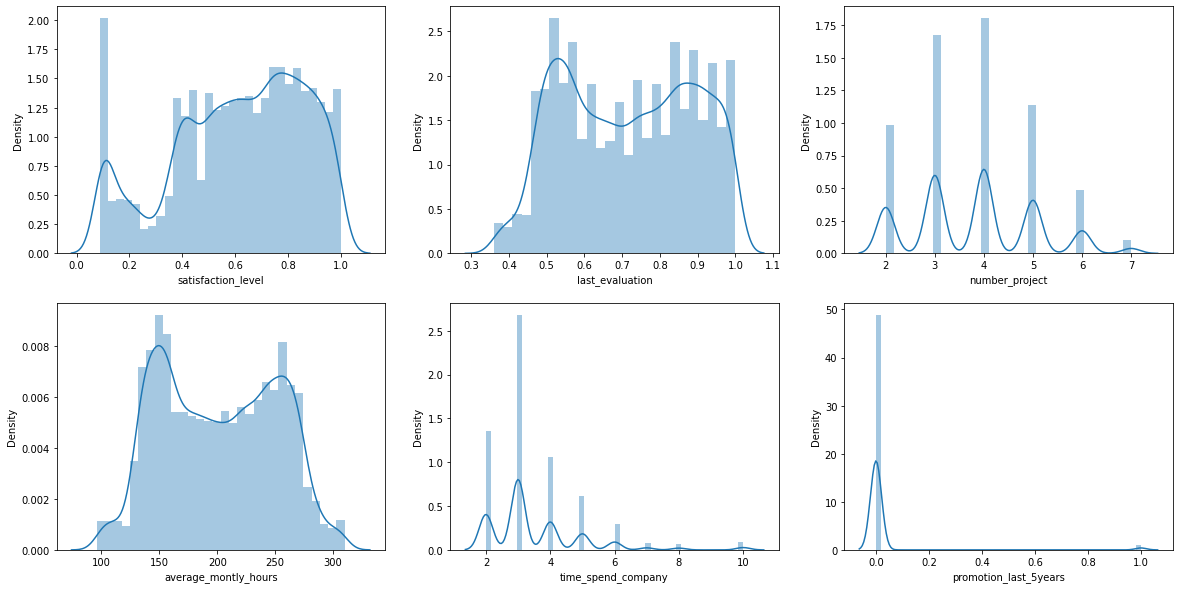

In [34]:
fig,ax = plt.subplots(2,3, figsize=(20,10))              
# 'ax' has references to all the four axes
sns.distplot(df_HR['satisfaction_level'], ax = ax[0,0]) 
sns.distplot(df_HR['last_evaluation'], ax = ax[0,1]) 
sns.distplot(df_HR['number_project'], ax = ax[0,2]) 
sns.distplot(df_HR['average_montly_hours'], ax = ax[1,0]) 
sns.distplot(df_HR['time_spend_company'], ax = ax[1,1]) 
sns.distplot(df_HR['promotion_last_5years'], ax = ax[1,2])
 
plt.show()

In [27]:
# Vamos organizar as colunas por seu tipo (ou seja, int64, float64, objeto)
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'], float64: ['satisfaction_level', 'last_evaluation'], object: ['Department', 'salary']}

### Os dados fornecidos não têm valores em falta. Na HR Analytics, é pouco provável que os dados dos funcionários apresentem uma grande proporção de valores em falta, já que os departamentos de RH normalmente têm todos os dados pessoais e de emprego arquivados. 

### Visão geral das características numéricas

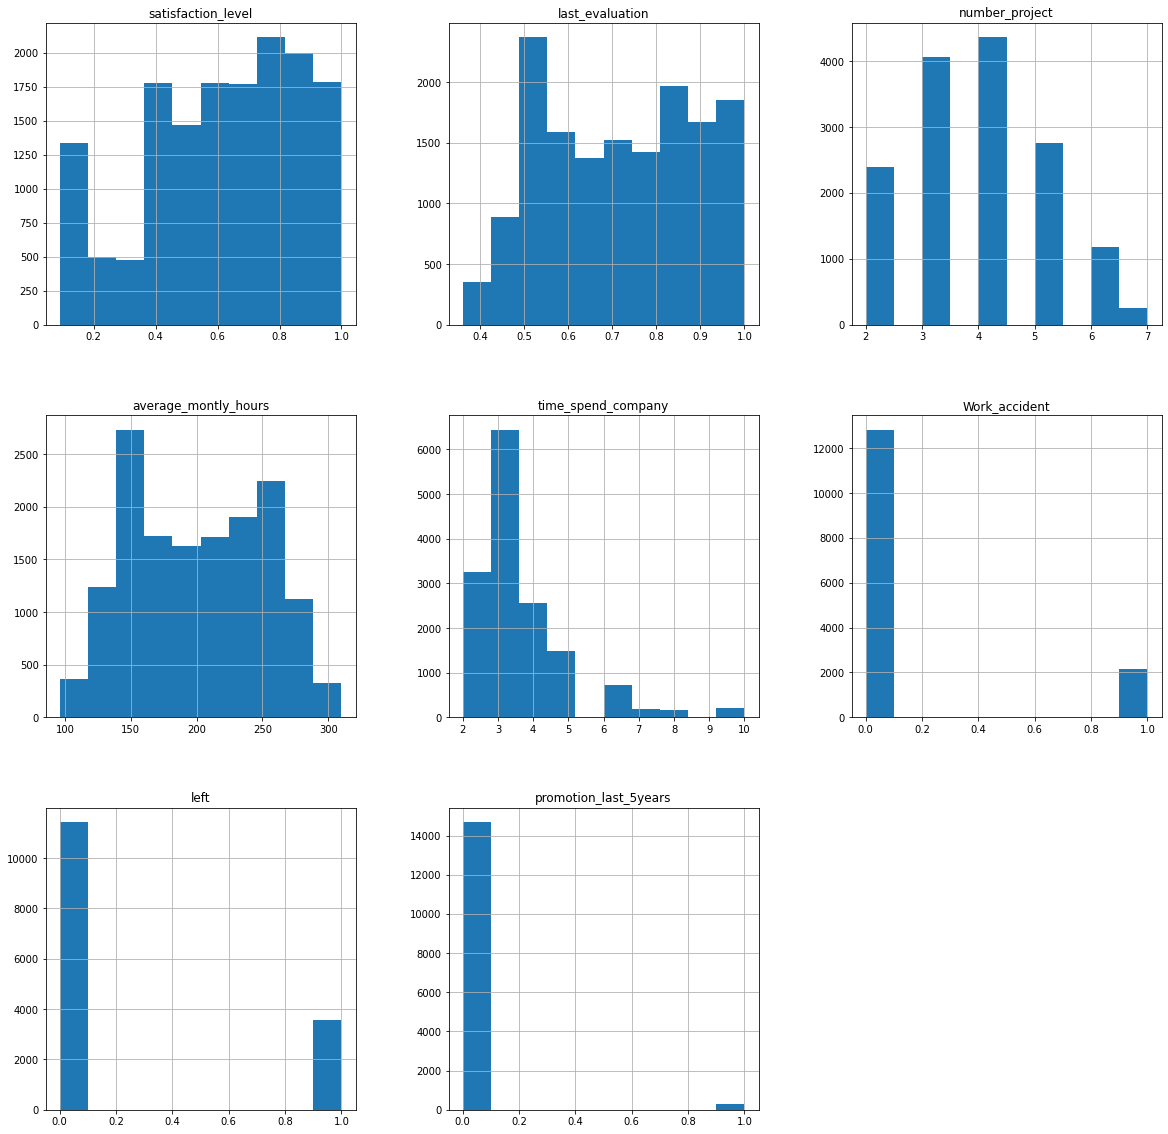

In [16]:
df_HR.hist(figsize=(20,20))
plt.show()

### Algumas observações podem ser feitas com base nas informações e histogramas de características numéricas:
###  Os métodos de transformação de dados podem ser necessários para abordar uma distribuição normal antes de ajustar um modelo aos dados.
* O histograma com uma caracteristicas de normal são (EmployeeID)(STATUS_YEAR)

* A variavel ( 'length_of_service) (store_name) não tem a curva parecida com uma normal. 

### Distribuição das características por atributo de destino
## AGE

In [ ]:
(mu, sigma) = norm.fit(df_HR.loc[df_HR['STATUS'] == 'ACTIVE', 'age'])
print(
    'Ex-Funcionario: Idade Média  = {:.1f} Idade e Desvio Padrão = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR.loc[df_HR['STATUS'] == 'TERMINATED', 'age'])
print(
    'Funcionario : Idade media  = {:.1f}Idade e Desvio Padrão  = {:.1f}'.format(mu, sigma))

Ex-Funcionario: Idade Média  = 41.8 Idade e Desvio Padrão = 12.2
Funcionario : Idade media  = 51.5Idade e Desvio Padrão  = 16.5


### Vamos criar um gráfico de estimativa da densidade do núcleo (KDE) colorido pelo valor do alvo. Uma estimativa da densidade do núcleo (KDE) é uma forma não paramétrica de estimar a função de densidade de probabilidade de uma variável aleatória. Ela nos permitirá identificar se existe uma correlação entre a idade do cliente e sua capacidade de pagá-la de volta.

In [ ]:
# Education Field of employees
df_HR['STATUS_YEAR'].value_counts()

2013    5320
2012    5231
2014    5215
2011    5082
2010    4963
2015    4961
2009    4852
2008    4767
2007    4683
2006    4579
Name: STATUS_YEAR, dtype: int64

In [ ]:
df_Status_Year = pd.DataFrame(columns=["STATUS", "% of Leavers"])
i=0
for field in list(df_HR['STATUS_YEAR'].unique()):
    ratio = df_HR[(df_HR['STATUS_YEAR']==field)&(df_HR['STATUS']=="ACTIVE")].shape[0] / df_HR[df_HR['STATUS_YEAR']==field].shape[0]
    df_Status_Year.loc[i] = (field, ratio*100)
    i += 1
print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_Status_Year.groupby(by="STATUS").sum()
df_EF.iplot(kind='bar',title='Leavers by Education Field (%)')

In 2015, the ratio of leavers is 96.73%


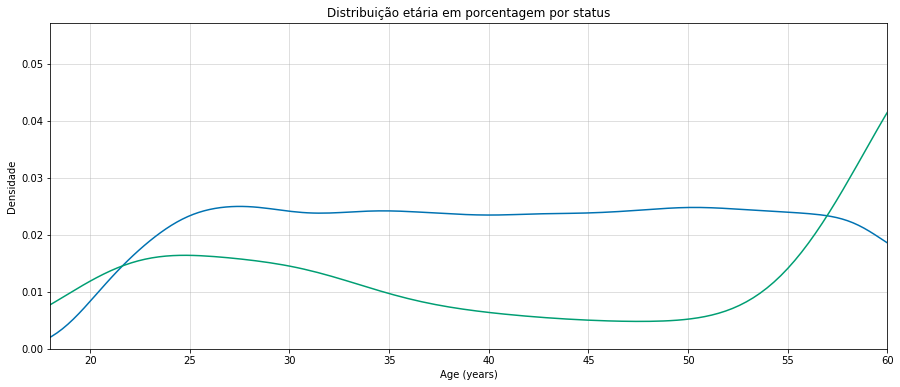

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['STATUS'] ==  'ACTIVE', 'age' ],  label = 'Empregado')
sns.kdeplot(df_HR.loc[df_HR['STATUS'] == 'TERMINATED', 'age'], label = 'Ex-Empregado')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Densidade')
plt.title('Distribuição etária em porcentagem por status');
plt.show()

### Genero

In [ ]:
# Genero dos funcionarios
df_HR['gender_full'].value_counts()

Female    25898
Male      23755
Name: gender_full, dtype: int64

In [ ]:
print("Distribuição de gênero normalizada de ex-empregados no conjunto de dados: Homem = {:.1f}%; Feminino {:.1f}%.".format((df_HR[(df_HR['STATUS'] == 'ACTIVE') & (
    df_HR['gender_full'] == 'Male')].shape[0] / df_HR[df_HR['gender_full'] == 'Male'].shape[0])*100, (df_HR[(df_HR['STATUS'] == 'ACTIVE') & (df_HR['gender_full'] == 'Female')].shape[0] / df_HR[df_HR['gender_full'] == 'Female'].shape[0])*100))

Distribuição de gênero normalizada de ex-empregados no conjunto de dados: Homem = 97.6%; Feminino 96.5%.


In [ ]:
df_Gender = pd.DataFrame(columns=["gender_full", "% of Leavers"])
i=0
for field in list(df_HR['gender_full'].unique()):
    ratio = df_HR[(df_HR['gender_full']==field)&(df_HR['STATUS']=="ACTIVE")].shape[0] / df_HR[df_HR['gender_full']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="gender_full").sum()
df_G.iplot(kind='bar',title='Leavers by Gender (%)')


In Male, the ratio of leavers is 97.60%
In Female, the ratio of leavers is 96.47%


In [ ]:
df_HR['termreason_desc'].value_counts()

Not Applicable    48168
Retirement          885
Resignaton          385
Layoff              215
Name: termreason_desc, dtype: int64

In [ ]:
df_HR['termtype_desc'].value_counts()

Not Applicable    48168
Voluntary          1270
Involuntary         215
Name: termtype_desc, dtype: int64